*看到知乎上某大神的一个[线性回归实例](https://zhuanlan.zhihu.com/p/36553041)，描述很清晰，跟着一起做下来对线性回归有了一个整体的认识，本文原文基础上做了一点小小的补充*

# 线性回归

## 0. 引言

线性回归可以说是机器学习中最简单的一种模型了，在很多问题上，如果特征工程做的足够好，线性模型已经足够解决很大一部分问题了，这也符合在机器学习中公认的**奥卡姆剃刀原则(Ockham's Razor)**，在解决实际问题时，尽量选择简单有效的模型。

虽然线性回归的模型简单，但其解决问题的基本流程与其他机器学习问题大同小异，都会涉及到问题定义、目标函数、损失函数、优化与验证等环节。总的来说，通过线性回归的实验来认识机器学习工程的整体架构是学习机器学习非常好的方法。

开始之前少不了的机器学习三件套
- numpy
- sklearn
- matplotlib

为了更直观的了解线性回归各个步骤之间的关系，暂时没有使用高度封装的sklearn库

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## 1. 问题设定

已知有$N$个$x,y$对构成的数据集$X,Y$，其中$x$是特征值，$y$是目标值，我们的目的是通过给定的数据集学习出一种模式，当给出一个新的特征$x^\prime$，能够推断出其对应的目标值$y^\prime$。

这里先模拟100个样本组成的数据集，其分布大致符合线性函数$y=2x+3$，为了更好的模拟真实情况，在生成数据时会添加一个微小的偏移量。当然，这里的函数$y=2x+3$事先我们并不知道，我们唯一能拿到的只有一堆$x$和$y$组成的数据对，而我们的目的就是要通过这些数据对去反推出某个符合条件的函数。

最终得到的数据分布如下所示：

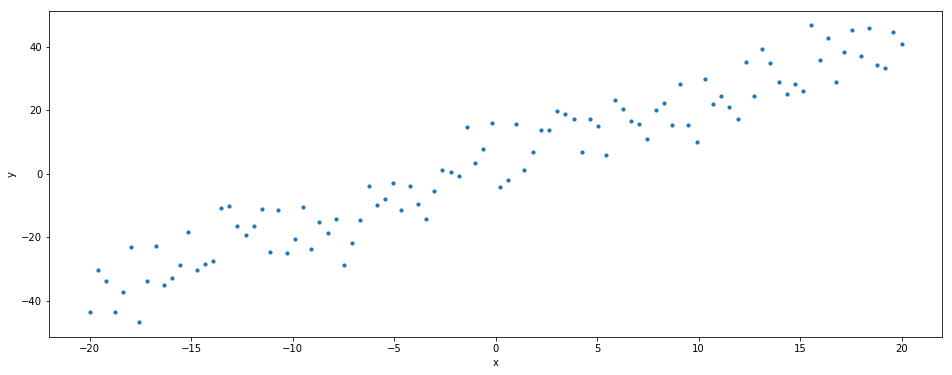

In [2]:
np.random.seed(123)

data_count = 100
x_data = np.linspace(-20, 20, data_count)
y_data = np.multiply(2, x_data) + 3 + np.random.normal(loc=0, scale=6.0, size=(data_count,))

plt.figure(figsize=(16, 6))
plt.scatter(x_data, y_data, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

通过观察可以发现，数据集中$X$和$Y$的分布近似呈线性关系，于是我们很自然地联想到可以将问题转化为求一个关于$x$和$y$的线性函数$y=wx+b$，当有新的样本$x^\prime$抵达时，我们只需将其输入到函数中便可以得到其对应的目标值$y^\prime$，这就是我们所说的**线性回归**

## 2. 定义目标函数

- $\displaystyle h(x)=wx+b$

其中$x$是特征变量，$w$和$b$是函数的参数

我们的目标是通过该函数拟合数据集$X,Y$的分布，即对每一个取值$x_i$，其对应的函数值$h(x_i)$要尽可能的接近样本的真实值$y_i$

但是目前而言，$w$和$b$的值是未知的，而一旦定义好$w$和$b$的取值，最终的函数也就确定了，我们也就可以使用该函数对新的自变量$x$进行预测了

于是，问题又转变成了求线性方程的参数$w$和$b$，来确定目标函数的最终形态

最简单的方法就是像下面这样随机给定一组$w,b$：

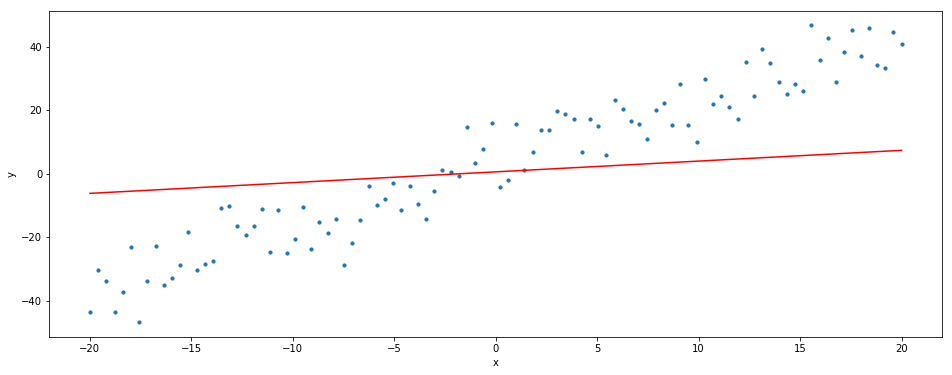

In [3]:
w = np.random.rand()
b = np.random.rand()
y_predict = w * x_data + b

plt.figure(figsize=(16, 6))
plt.scatter(x_data, y_data, s=10)
plt.plot(x_data, y_predict, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

显然，这种方法无法很好的完成任务，有相当一部分样本与该函数的图形存在较大偏差，这样的情况我们通常称为**欠拟合**。

为了解决这个问题，我们需要探寻某种方法来获得一组相对优质的参数$w,b$，这组参数应该能使目标函数尽可能的拟合数据集的分布。

容易看出，对于数据集中的一个特征值$x_i$，其对应的目标值$y_i$与函数值$h(x_i)$的距离越接近，则函数对数据的拟合程度越好，而对于整个数据集来说，就是所有样本的目标值与函数值距离的和最小，这就是我们所说的**损失函数**。

## 3. 定义损失函数

- $\displaystyle loss(w,b)=\frac{1}{N}\sum_{i=0}^{N}(h(x_i)-y_i)^2=\frac{1}{N}\sum_{i=0}^{N}(wx_i+b-y_i)^2$

这里定义的损失函数被称作平方损失，定义是所有样本误差平方和，选取的参数使得该函数值越小，则目标函数对数据集的拟合程度就越小，当然，这种方法也有弊端，就是对数据集中的异常数据较为敏感，反应到最终模型上一般表现为**鲁棒性较差**。

现在我们的问题转变为寻找合适的$w,b$，使得$loss(w,b)$取值最小化，为了更直观的认识损失函数，这里将损失函数的大致图像呈现出来：

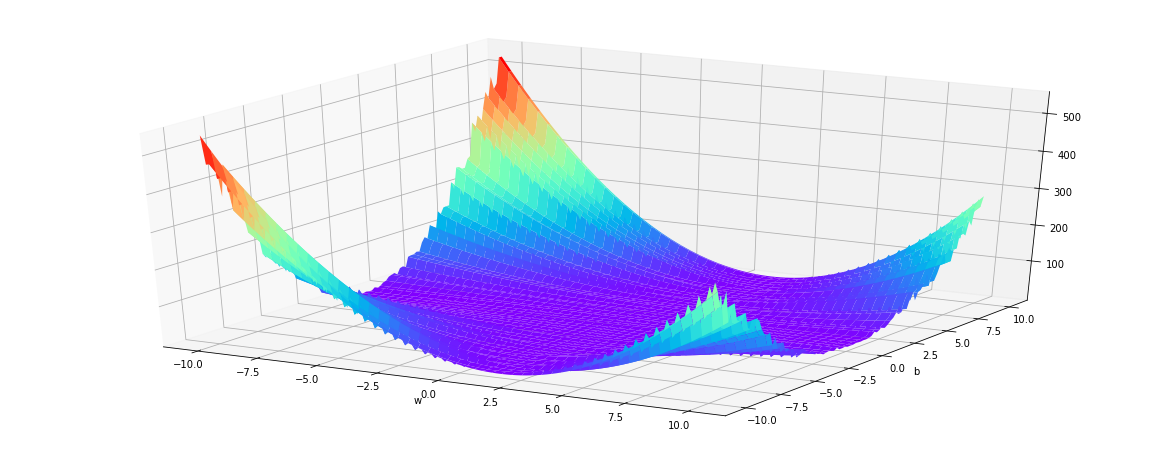

In [4]:
w_sample = np.linspace(-10, 10, data_count).reshape((-1, 1))
b_sample = np.linspace(-10, 10, data_count).reshape((-1, 1))

x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

loss = np.square(np.dot(w_sample, x_data.T) + b_sample - y_data) / data_count

figure = plt.figure(figsize=(16, 6))
axes = Axes3D(figure)
axes.set_xlabel('w')
axes.set_ylabel('b')
axes.plot_surface(w_sample.T, b_sample, loss, cmap='rainbow')
plt.show()

可以看出，平方损失函数的图像大致呈一个抛物面形态，理论上是可以找到一个极值点使得损失函数取值达到最小的。

事实上，线性回归问题是可以使用最小二乘法来转化为一个**凸优化**问题的，但为了能够与一般的机器学习问题关联更紧密，在这里会采用**梯度下降**算法来优化参数的取值，与最小二乘法直接求得极值不同，梯度下降法是先随机指定一组参数值，然后通过不断迭代来寻找局部最优解。

## 4. 梯度下降

梯度下降是机器学习中最常见的一种优化算法，其原理是通过不断迭代更新参数，最终使损失函数能够收敛到一个局部最小值，而每一次迭代都是将参数往损失函数值下降最快的方向移动，这个方向就是由损失函数的梯度来决定的。因此，首先对损失函数中的每个参数求偏导：

- $\displaystyle\frac{\partial loss(w,b)}{\partial w}=\frac{2}{N}\sum_{i=0}^N(wx_i+b-y_i)\cdot x_i$
- $\displaystyle\frac{\partial loss(w,b)}{\partial b}=\frac{2}{N}\sum_{i=0}^N(wx_i+b-y_i)$

偏导数最重要的作用是给我们指示了更新参数时的移动方向，原来的参数每一次都往其偏导数的反方向前进一个距离，而这个距离一般是通过学习速率$\alpha$来控制的，下面就是参数$w$和$b$的更新过程：

- $\displaystyle w_{t+1}=w_{t}-\alpha\frac{\partial loss(w_t,b_t)}{\partial w}$
- $\displaystyle b_{t+1}=b_{t}-\alpha\frac{\partial loss(w_t,b_t)}{\partial b}$

这里有两个需要注意的点：
1. 每一次迭代都是同步更新所有参数，即每个参数值在一次迭代中都是使用上一批的所有参数值进行计算
2. 学习速率$\alpha$的选取需适度，过小会使得收敛速度太慢，过大则容易造成梯度发散，无法收敛；一般实际操作时会定义一系列学习率备选值，通过实验选择较好的一个，当然更好的做法是使用改进的梯度下降算法如Adadelta等，这些改进的算法能够在训练过程中自动调整学习速率。

现在我们来看一下使用梯度下降算法进行训练的过程中，各个参数以及损失函数的值是如何变化的：

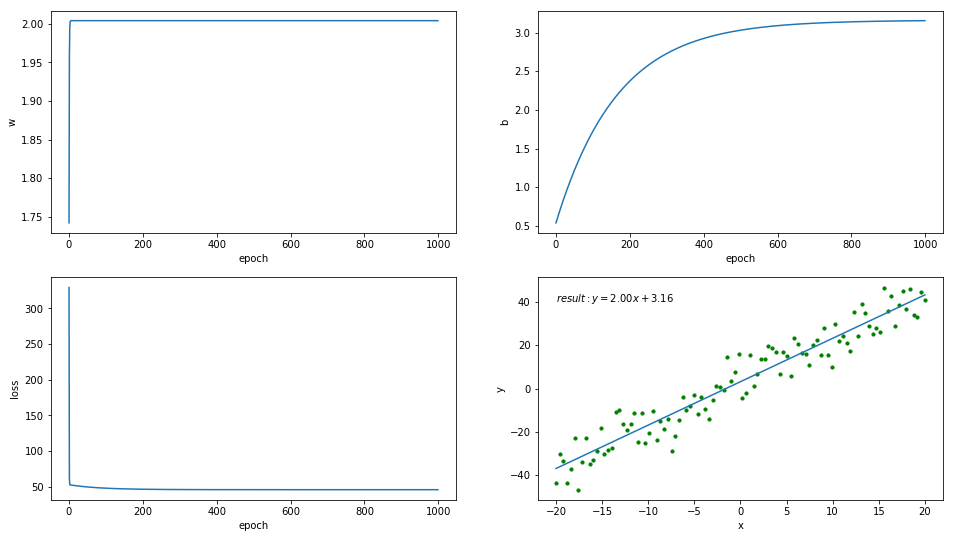

result:
w: 2.00
b: 3.16


In [5]:
# 初始随机设定参数值
w = np.random.rand()
b = np.random.rand()

# 用于保存参数及损失函数值在每一次迭代过程中的取值
w_cache, b_cache, loss_cache = [], [], []

alpha = 0.003    # 学习率设定为0.003
epoch = 1000     # 迭代次数设定为1000

for t in range(epoch):
    y_predict = w * x_data + b
    diff = y_predict - y_data
    grad_w = 2 * np.mean(diff * x_data)
    grad_b = 2 * np.mean(diff)
    
    w -= alpha * grad_w
    b -= alpha * grad_b
    loss = np.sum(np.square(diff)) / data_count
    
    w_cache.append(w)
    b_cache.append(b)
    loss_cache.append(loss)
   
y_predictt = w * x_data + b

plt.figure(figsize=(16, 9))
epochs = list(range(epoch))

plt.subplot(221)
plt.plot(epochs, w_cache)
plt.xlabel('epoch')
plt.ylabel('w')

plt.subplot(222)
plt.plot(epochs, b_cache)
plt.xlabel('epoch')
plt.ylabel('b')

plt.subplot(223)
plt.plot(epochs, loss_cache)
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(224)
plt.scatter(x_data, y_data, s=10, color='g')
plt.plot(x_data, y_predict)
plt.xlabel('x')
plt.ylabel('y')
plt.text(-20, 40, '$result: y=%.2fx+%.2f$' % (w, b))
plt.show()

print('result:')
print('w: %.2f' % w)
print('b: %.2f' % b)

从图中可以看出，随着训练的进行，参数$w,b$和损失函数值$loss$的变化都趋于平稳。训练结束后，得到优化的参数$w$和$b$的值分别是2.0和3.16，十分接近模拟数据时给定的真实参数，从图像中也可能看出来，最终求得的函数已经能够非常好的拟合原始数据了。

到这里，关于线性函数的相关知识点就告一段落了，目前只是针对单变量的简单线性回归，通过numpy库可以很容易的扩展到多变量的线性回归，原理与单变量线性回归基本一致。另外，为了简单起见，这次实践省略了部分环节，如特征选择、参数选择、验证以及测试等，这些在后续再展开实践。

## References

- https://zhuanlan.zhihu.com/p/36553041
- https://zhuanlan.zhihu.com/p/27449596